In [45]:
import pandas as pd
import numpy as np
import os
import glob
import seaborn as sb
import matplotlib.pyplot as plt


# Loading data set

In [46]:
folder = 'Open University Dataset/'
os.listdir(folder)

['assessments.csv',
 'courses.csv',
 'studentAssessment.csv',
 'studentInfo.csv',
 'studentRegistration.csv',
 'studentVle.csv',
 'vle.csv']

In [47]:
table = []
for file in os.listdir(folder):
    table.append(pd.read_csv(folder+file))
    table[-1].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206 entries, 0 to 205
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   code_module                 206 non-null    object 
 1   code_presentation           206 non-null    object 
 2   id_assessment               206 non-null    int64  
 3   assessment_type             206 non-null    object 
 4   assessment_submission_date  195 non-null    float64
 5   weight                      206 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   code_module                 22 non-null     object
 1   code_presentation           22 non-null     object
 2   module_presentation_length  22 non-null     int

# Table Selection

## Student info table

In [48]:
table[3]

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


## Student vle table

In [49]:
table[5]

,code_module,code_presentation,id_student,id_site,student_interaction_date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
1048570,BBB,2013J,609046,704113,133,1
1048571,BBB,2013J,609046,703735,133,1
1048572,BBB,2013J,609307,703732,133,1
1048573,BBB,2013J,609307,703732,133,1


# Data Preparation / Data Wrangling
It is the process of cleaning data by reformatting, correcting errors, and combining data sets for preprocessing

## Dropping Date and Grouping

In [50]:
student_vle = table[5].copy(deep=True)
# Since we are merging the data and 'student_interaction_date' is not going to hinder performance classification
student_vle.drop('student_interaction_date',axis=1)
new_student_vle = student_vle.groupby(['code_module','code_presentation','id_student']).sum()['sum_click'].reset_index()
new_student_vle.head()

,code_module,code_presentation,id_student,sum_click
0,AAA,2013J,11391,934
1,AAA,2013J,28400,1435
2,AAA,2013J,30268,281
3,AAA,2013J,31604,2158
4,AAA,2013J,32885,1034


## Merging Student info table and New Student vle tabel

In [51]:
x = set(table[3].columns)    
y = set(new_student_vle)
z = x.intersection(y)
SP_data  = pd.merge(table[3],new_student_vle,on=list(z),how='inner')
SP_data.head() 

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,sum_click
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,934
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,1435
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,281
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,2158
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,1034


## Creating copies of data for future use

In [52]:
True_data1 = SP_data.copy(deep=True)
True_data2 = SP_data.copy(deep=True)
True_data3 = SP_data.copy(deep=True)
SP_data.columns


Index(['code_module', 'code_presentation', 'id_student', 'gender', 'region',
       'highest_education', 'imd_band', 'age_band', 'num_of_prev_attempts',
       'studied_credits', 'disability', 'final_result', 'sum_click'],
      dtype='object')

In [53]:
True_data1['imd_band'].isnull().sum()

55

## Updating Null and irrelavant values to relavant values

In [54]:
True_data1['imd_band'].unique()

array(['90-100%', '20-30%', '30-40%', '50-60%', '80-90%', '70-80%', nan,
       '60-70%', '40-50%', '10-20', '0-10%'], dtype=object)

In [55]:
True_data1['imd_band'].shape

(4137,)

In [56]:
True_data1.shape


(4137, 13)

In [57]:
# Converted to '50-60%' on the basis of taking mean with the relavant values
True_data1['imd_band'] = True_data1['imd_band'].replace([np.nan],'50-60%')
True_data2['imd_band'] = True_data2['imd_band'].replace([np.nan],'50-60%')
True_data3['imd_band'] = True_data3['imd_band'].replace([np.nan],'50-60%')
True_data1['imd_band'].unique()

array(['90-100%', '20-30%', '30-40%', '50-60%', '80-90%', '70-80%',
       '60-70%', '40-50%', '10-20', '0-10%'], dtype=object)

## Preparing data for feature selection

In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [59]:
le = LabelEncoder()
colmns = True_data1.columns.tolist()
for col in colmns:
    if True_data1[col].dtype == 'object':
        True_data1[col] = le.fit_transform(True_data1[col])

In [60]:
y = True_data1['final_result'] #Classification variable

#  Columns Not selected and why ?
#  'id_student' is not going to affect student performance because it is a primary key 
#  'code_presentation' is a date specifying the timeline of the course, we dont need timeline here

X = True_data1[[ 'age_band','gender','highest_education','imd_band','num_of_prev_attempts','region','sum_click']]

X.shape,y.shape 

((4137, 7), (4137,))

## Checking for null values in the prepared data

In [61]:
print('X:',X.isnull().sum(),'\ny:',y.isnull().sum())

X: age_band                0
gender                  0
highest_education       0
imd_band                0
num_of_prev_attempts    0
region                  0
sum_click               0
dtype: int64 
y: 0


## Train and Test data splitting

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3)


In [63]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2895, 7)
(1242, 7)
(2895,)
(1242,)


# Feature Selection

## Correlation matrix heatmap
Helps us in finding out the co-relation between two attributes

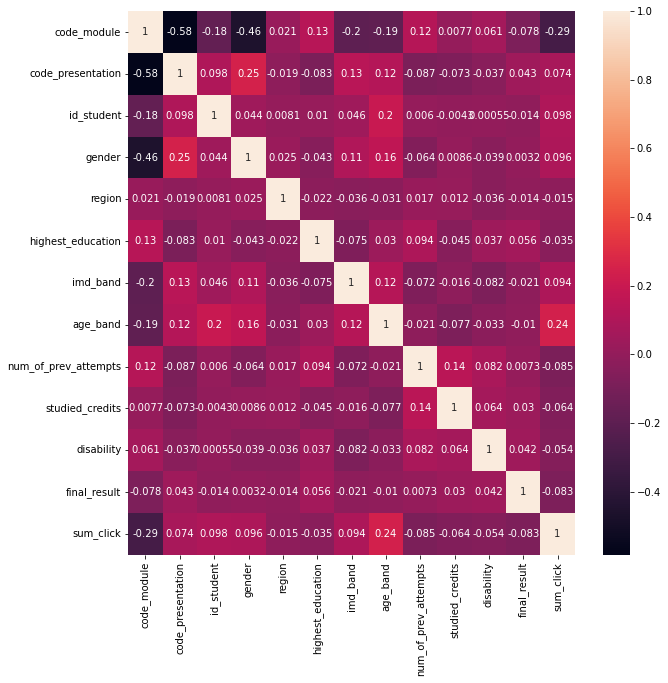

In [64]:

True_data1.corr()
plt.figure(figsize=(10,10))

# plotting correlation heatmap
dataplot = sb.heatmap(True_data1.corr(), annot=True)
  
# displaying heatmap
plt.show()

## Mutual Information classification
Mutual information (MI) between two random variables 
is a non-negative value, which measures the dependency between the variables. It is equal to zero 
if and only if two random variables are independent, and higher values mean higher dependency.


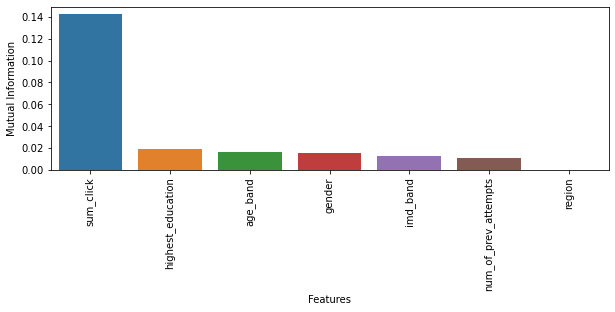

In [65]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
mutual_info =  mutual_info_classif(X_train,y_train,random_state = 50)

final_df_mutual = pd.DataFrame({"Features": X_train.columns, "Mutual Information":mutual_info})
final_df_mutual.set_index('Mutual Information')

# Sort in ascending order for better visualization.
final_df_mutual = final_df_mutual.sort_values('Mutual Information',ascending=False)

plt.figure(figsize=(10,3))
plt.xticks(rotation=90)
sb.barplot(x="Features",y= "Mutual Information", data=final_df_mutual)
plt.show()

## Select K Best using MI
The SelectKBest method selects the features according to the k highest score

In [66]:
#Selecting top 7 features
sel_features_mutual = SelectKBest(mutual_info_classif,k=7)
sel_features_mutual.fit(X_train,y_train)
X_train.columns[sel_features_mutual.get_support()]


Index(['age_band', 'gender', 'highest_education', 'imd_band',
       'num_of_prev_attempts', 'region', 'sum_click'],
      dtype='object')

## Random Forest Classification
A random forest is a meta estimator that fits a number of decision tree 
classifiers on various sub-samples of the dataset and uses averaging 
to improve the predictive accuracy and control over-fitting.

The gini impurity is calculated using the following formula \begin{equation} GiniIndex = 1 –  \sum \limits _{j} p ^{2} _{j} \end{equation} Where  pj is the  probability of  class  j  


n_estimators are the number of decision tree and max_depth is the depth of each tree

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn import metrics

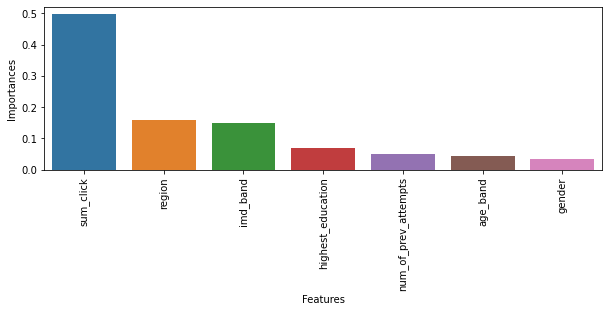

In [68]:

RFC = RandomForestClassifier(n_estimators= 100,max_depth = 10,criterion = 'gini')
RFC.fit(X_train, y_train)

# get the importance of the resulting features.
importances = RFC.feature_importances_
# create a data frame for visualization.
final_df_RFC = pd.DataFrame({"Features": X_train.columns, "Importances":importances})
final_df_RFC.set_index('Importances')

# sort in ascending order to better visualization.
final_df_RFC = final_df_RFC.sort_values('Importances',ascending=False)

# plot the feature importances as bar plot.
plt.figure(figsize=(10,3))
plt.xticks(rotation=90)
sb.barplot(x="Features",y= "Importances", data=final_df_RFC)
plt.show()

## Recursive feature elimination using RFC
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute or callable. Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.



In [69]:
RFC =  RandomForestClassifier(n_estimators= 100,max_depth = 10,criterion = 'gini')

# Selecting top 8 features with 1 recursive call

sel_feature_RFC = RFE(estimator=RFC, n_features_to_select=8, step=1)

X_train_rfe_tree = sel_feature_RFC.fit_transform(X_train, y_train)

X_train.columns[sel_feature_RFC.get_support()]

Index(['age_band', 'gender', 'highest_education', 'imd_band',
       'num_of_prev_attempts', 'region', 'sum_click'],
      dtype='object')

## Features to be eliminated according to RFC and MI

In [70]:
RFC_feat = set(X_train.columns[sel_feature_RFC.get_support()])
Mutual_feat = set(X_train.columns[sel_features_mutual.get_support()])
Tot_feat = set(True_data1.columns)
Unrel_feat = Tot_feat.difference(RFC_feat.union(Mutual_feat))
Unrel_feat 

{'code_module',
 'code_presentation',
 'disability',
 'final_result',
 'id_student',
 'studied_credits'}

## Dropping  Irrelevant attributes
### Relevant Attributes
- 'final_result' is our classification variable it is not irr relevant
- 'code_module' helps us to identify the course that each student has enrolled 
- 'disability' affects the performance of the students 

### Irrelevant Attributes

-  'code_presentation' is a date specifying the timeline of the course
-  'id_student' is not going to affect student performance because it is a primary key
-  'studied_credits' it related to code_module 

In [71]:
SP_data = SP_data.drop(['id_student', 'code_presentation','studied_credits' ],axis=1) 
SP_data

,code_module,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,disability,final_result,sum_click
0,AAA,M,East Anglian Region,HE Qualification,90-100%,55<=,0,N,Pass,934
1,AAA,F,Scotland,HE Qualification,20-30%,35-55,0,N,Pass,1435
2,AAA,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,Y,Withdrawn,281
3,AAA,F,South East Region,A Level or Equivalent,50-60%,35-55,0,N,Pass,2158
4,AAA,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,N,Pass,1034
...,...,...,...,...,...,...,...,...,...,...
4132,BBB,F,Scotland,HE Qualification,80-90%,35-55,0,N,Pass,1051
4133,BBB,F,South Region,Lower Than A Level,50-60%,0-35,0,Y,Distinction,107
4134,BBB,F,Yorkshire Region,Lower Than A Level,0-10%,0-35,0,N,Pass,387
4135,BBB,F,North Region,Lower Than A Level,0-10%,0-35,0,N,Fail,88


# Data Preprocessing

### Ordinal Data Cleaning
Ordinal data is a kind of categorical data with a set order or scale to it.

Check for null values

In [72]:
print(SP_data['imd_band'].isnull().sum())
print(SP_data['age_band'].isnull().sum())
print(SP_data['highest_education'].isnull().sum())

55
0
0


In [73]:
age_band_map = {
   '0-35':1, 
   '35-55':2, 
   '55<=':3 
}
imd_band_map = {
 '0-10%': 1,
 '10-20': 2,
 '20-30%': 3,
 '30-40%': 4,
 '40-50%': 5,
 '50-60%': 6,
 '60-70%': 7,
 '70-80%': 8,
 '80-90%': 9,
 '90-100%': 10
}

highest_education_map = {
 'No Formal quals':1,
 'Lower Than A Level':2,
 'A Level or Equivalent':3,
 'HE Qualification':4,
 'Post Graduate Qualification':5 
}


#Since imd_band has Null/Nan values(As shown above) lets fill it
SP_data['imd_band_num'] = SP_data['imd_band'].map(imd_band_map)
SP_data['imd_band_num'] = SP_data['imd_band_num'].fillna(value=SP_data['imd_band_num'].mean())


#Rest directly we can proceed with maping
SP_data['age_band_num'] = SP_data['age_band'].map(age_band_map)
SP_data['highest_education_num'] = SP_data['highest_education'].map(highest_education_map)

# SP_data['code_presentation_num'] = SP_data['code_presentation'].map(code_presentation_map)

SP_data




,code_module,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,disability,final_result,sum_click,imd_band_num,age_band_num,highest_education_num
0,AAA,M,East Anglian Region,HE Qualification,90-100%,55<=,0,N,Pass,934,10.0,3,4
1,AAA,F,Scotland,HE Qualification,20-30%,35-55,0,N,Pass,1435,3.0,2,4
2,AAA,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,Y,Withdrawn,281,4.0,2,3
3,AAA,F,South East Region,A Level or Equivalent,50-60%,35-55,0,N,Pass,2158,6.0,2,3
4,AAA,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,N,Pass,1034,6.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132,BBB,F,Scotland,HE Qualification,80-90%,35-55,0,N,Pass,1051,9.0,2,4
4133,BBB,F,South Region,Lower Than A Level,50-60%,0-35,0,Y,Distinction,107,6.0,1,2
4134,BBB,F,Yorkshire Region,Lower Than A Level,0-10%,0-35,0,N,Pass,387,1.0,1,2
4135,BBB,F,North Region,Lower Than A Level,0-10%,0-35,0,N,Fail,88,1.0,1,2


Check for null values

In [74]:
print(SP_data['imd_band_num'].isnull().sum())
print(SP_data['age_band_num'].isnull().sum())
print(SP_data['highest_education_num'].isnull().sum())


0
0
0


### Nominal data cleaning
Nominal data is data that can be labelled or classified into mutually exclusive categories within a variable. These categories cannot be ordered in a meaningful way.

Check for null values

In [75]:
print(SP_data['region'].isnull().sum())
print(SP_data['code_module'].isnull().sum())
print(SP_data['gender'].isnull().sum())
print(SP_data['disability'].isnull().sum())
print(SP_data['final_result'].isnull().sum())


0
0
0
0
0


### One Hot Encoding (OHE)
One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.
Converted into binary forms of 1s and 0s

In [76]:
# Since No Null/Nan values in the above nominal
# columns we can proceed with one hot encoding

binary_region = pd.get_dummies(SP_data['region'])
binary_code_module = pd.get_dummies(SP_data['code_module'])
binary_gender = pd.get_dummies(SP_data['gender'])
binary_disability = pd.get_dummies(SP_data['disability'])
binary_final_result = pd.get_dummies(SP_data['final_result'])

# appending ohe columns
SP_data = pd.concat([
        SP_data,
        binary_region,
        binary_code_module,
        binary_gender,
        binary_disability,
        binary_final_result
    ],axis='columns')

#removing old columns
Cleaned_SP_data = SP_data.drop(['region'
                                ,'code_module'
                                ,'gender'
                                ,'disability'
                                ,'final_result'
                                ,'imd_band'
                                ,'age_band'
                                ,'highest_education'

                               ]
                               ,axis='columns')
Cleaned_SP_data

,num_of_prev_attempts,sum_click,imd_band_num,age_band_num,highest_education_num,East Anglian Region,East Midlands Region,Ireland,London Region,North Region,...,AAA,BBB,F,M,N,Y,Distinction,Fail,Pass,Withdrawn
0,0,934,10.0,3,4,1,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
1,0,1435,3.0,2,4,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
2,0,281,4.0,2,3,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
3,0,2158,6.0,2,3,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
4,0,1034,6.0,1,2,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132,0,1051,9.0,2,4,0,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0
4133,0,107,6.0,1,2,0,0,0,0,0,...,0,1,1,0,0,1,1,0,0,0
4134,0,387,1.0,1,2,0,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0
4135,0,88,1.0,1,2,0,0,0,0,1,...,0,1,1,0,1,0,0,1,0,0


# Feature Scaling
Feature scaling is a method used to normalize the range of independent variables or features of data.
Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization.

### Standardization ( Z - Score )
Standardization is the concept and step of putting different variables on the same scale. This concept allows comparing scores between different types of variables.

\begin{equation} Z = (x-μ)/σ \end{equation}

In [77]:
from sklearn.preprocessing import StandardScaler
Z_Score_Scaler = StandardScaler()
Standardized_SP_data = Z_Score_Scaler.fit_transform(Cleaned_SP_data)
Standardized_SP_data = pd.DataFrame(Standardized_SP_data,columns = list(Cleaned_SP_data.columns))
Standardized_SP_data 

,num_of_prev_attempts,sum_click,imd_band_num,age_band_num,highest_education_num,East Anglian Region,East Midlands Region,Ireland,London Region,North Region,...,AAA,BBB,F,M,N,Y,Distinction,Fail,Pass,Withdrawn
0,-0.365004,0.062679,1.750364,3.175858,1.788101,2.799954,-0.268402,-0.220611,-0.312938,-0.191265,...,2.151411,-2.151411,-2.031353,2.031353,0.322163,-0.322163,-0.315723,-0.554919,1.018789,-0.473631
1,-0.365004,0.436394,-0.774366,1.211366,1.788101,-0.357149,-0.268402,-0.220611,-0.312938,-0.191265,...,2.151411,-2.151411,0.492283,-0.492283,0.322163,-0.322163,-0.315723,-0.554919,1.018789,-0.473631
2,-0.365004,-0.424419,-0.413690,1.211366,0.395523,-0.357149,-0.268402,-0.220611,-0.312938,-0.191265,...,2.151411,-2.151411,0.492283,-0.492283,-3.104023,3.104023,-0.315723,-0.554919,-0.981558,2.111346
3,-0.365004,0.975708,0.307661,1.211366,0.395523,-0.357149,-0.268402,-0.220611,-0.312938,-0.191265,...,2.151411,-2.151411,0.492283,-0.492283,0.322163,-0.322163,-0.315723,-0.554919,1.018789,-0.473631
4,-0.365004,0.137273,0.307661,-0.753126,-0.997055,-0.357149,-0.268402,-0.220611,-0.312938,-0.191265,...,2.151411,-2.151411,0.492283,-0.492283,0.322163,-0.322163,-0.315723,-0.554919,1.018789,-0.473631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132,-0.365004,0.149954,1.389688,1.211366,1.788101,-0.357149,-0.268402,-0.220611,-0.312938,-0.191265,...,-0.464811,0.464811,0.492283,-0.492283,0.322163,-0.322163,-0.315723,-0.554919,1.018789,-0.473631
4133,-0.365004,-0.554213,0.307661,-0.753126,-0.997055,-0.357149,-0.268402,-0.220611,-0.312938,-0.191265,...,-0.464811,0.464811,0.492283,-0.492283,-3.104023,3.104023,3.167333,-0.554919,-0.981558,-0.473631
4134,-0.365004,-0.345350,-1.495717,-0.753126,-0.997055,-0.357149,-0.268402,-0.220611,-0.312938,-0.191265,...,-0.464811,0.464811,0.492283,-0.492283,0.322163,-0.322163,-0.315723,-0.554919,1.018789,-0.473631
4135,-0.365004,-0.568386,-1.495717,-0.753126,-0.997055,-0.357149,-0.268402,-0.220611,-0.312938,5.228347,...,-0.464811,0.464811,0.492283,-0.492283,0.322163,-0.322163,-0.315723,1.802064,-0.981558,-0.473631


### Normalization ( Min Max )
Min-max normalization (usually called feature scaling) performs a linear transformation on the original data. This technique gets all the scaled data in the range (0, 1).
\begin{equation} x_{scaled} = (x-x_{min})/(x_{max}-x_{min}) \end{equation}

In [78]:
from sklearn.preprocessing import MinMaxScaler
MinMax_Scaler = MinMaxScaler()
Normalized_SP_data = MinMax_Scaler.fit_transform(Cleaned_SP_data)
Normalized_SP_data = pd.DataFrame(Normalized_SP_data,columns = list(Cleaned_SP_data.columns))
Normalized_SP_data

,num_of_prev_attempts,sum_click,imd_band_num,age_band_num,highest_education_num,East Anglian Region,East Midlands Region,Ireland,London Region,North Region,...,AAA,BBB,F,M,N,Y,Distinction,Fail,Pass,Withdrawn
0,0.0,0.059370,1.000000,1.0,0.75,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.091250,0.222222,0.5,0.75,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.017817,0.333333,0.5,0.50,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.137257,0.555556,0.5,0.50,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.065733,0.555556,0.0,0.25,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132,0.0,0.066815,0.888889,0.5,0.75,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4133,0.0,0.006745,0.555556,0.0,0.25,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4134,0.0,0.024563,0.000000,0.0,0.25,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4135,0.0,0.005536,0.000000,0.0,0.25,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


## K-Means Clustering 
K-Means Clustering is an unsupervised learning algorithm that is used to solve the clustering problems in machine learning or data science.The algorithm groups the unlabeled dataset into different clusters.

In [79]:
from sklearn.cluster import KMeans


### Elbow Method 
The Elbow method is one of the most popular ways to find the optimal number of clusters. This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster

\begin{equation} WCSS = \sum P_{\text{i in Cluster 1}} distance (P_{i} C_{1}) + \sum P_{\text{i in Cluster 2}} distance (P_{i} C_{2}) + ..... + \sum P_{\text{i in Cluster k}} distance (P_{i} C_{k}) \end{equation}

∑Pi in Cluster1 distance(Pi C1)2: It is the sum of the square of the distances between each data point and its centroid within a cluster1 and the same for the other two terms.

To measure the distance between data points and centroid, we can use any method such as Euclidean distance or Manhattan distance.
The sharp point of bend of the plot looks between calculated WCSS values and the number of clusters K, like an arm, is considered as the best value of K.

In [80]:
def ElbowMethod(Data,KRange):
    KValues = []
    inertias = []
    for k in KRange:
        K_Means = KMeans(n_clusters = k)
        K_Means.fit(Data)
        KValues.append(k)
        inertias.append(K_Means.inertia_)
        
   
    plt.figure(figsize=(16,8))
    plt.plot(KValues,inertias,'o-')
    plt.plot(
        [
            KValues[0],
            KValues[KRange[-2]]
        ],
        [
            inertias[0],
            inertias[KRange[-2]]
        ],
        'ro-'
    )
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()


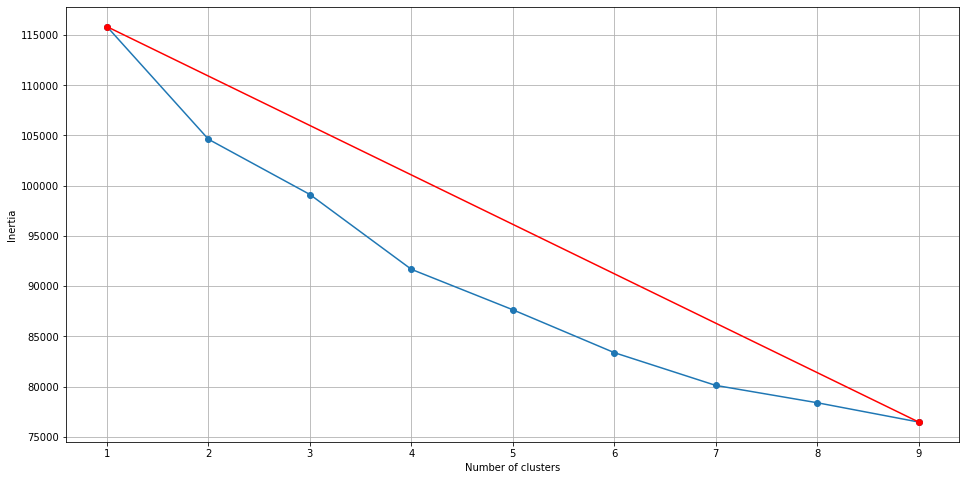

In [81]:
ElbowMethod(Data = Standardized_SP_data ,KRange = range(1,10))

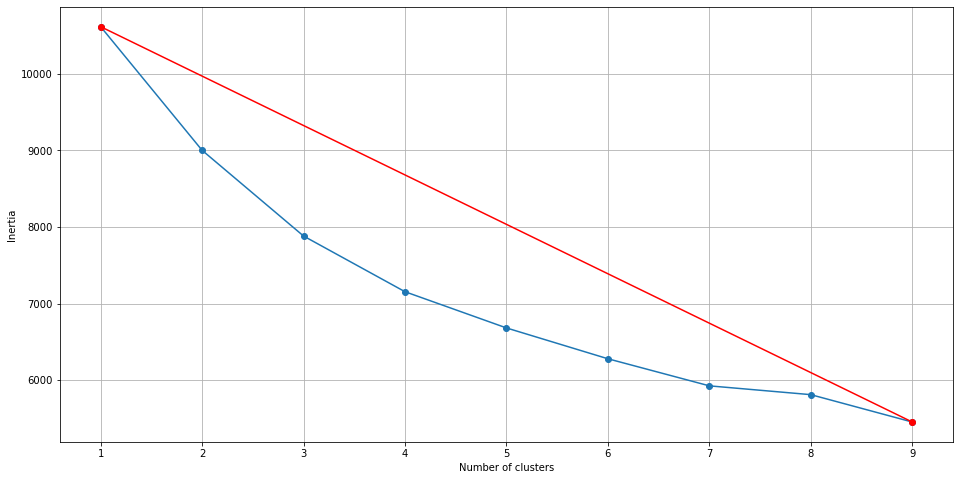

In [82]:
ElbowMethod(Data = Normalized_SP_data ,KRange = range(1,10))

Obtained value of K is 4 for Standardized Data and 3 for Normalized Data

## Davies Bouldin Method
The Davies-Bouldin index (DBI) is one of the clustering algorithms evaluation measures. It is most commonly used to evaluate the goodness of split by a K-Means clustering algorithm for a given number of clusters.
In a few words, the score (DBI) is calculated as the average similarity of each cluster with a cluster most similar to it. The lower the average similarity is, the better the clusters are separated and the better is the result of the clustering performed.

\begin{equation} \bar{R} = \frac{1}{N}\sum_{i=1}^{N}R_i \\ \text{A smaller} \hspace{1mm} \bar{R} \hspace{1mm}  \text{ represents better defined clusters.}\end{equation} 


In [83]:
from sklearn.metrics import davies_bouldin_score

In [84]:
def Davies_Bouldin_Method(Data,KRange):
    KValues = []
    db_indices = []
    for k in KRange:
        K_Means = KMeans(n_clusters=k,random_state=42)
        labels = K_Means.fit_predict(Data)
        db_indices.append(davies_bouldin_score(Data, labels))
        KValues.append(k)
        
    plt.figure(figsize=(16,8))
    plt.plot(KValues, db_indices)
    plt.xlabel("Number of clusters")
    plt.ylabel("Davies-Boulding Index")
    plt.grid(True)
    plt.show()
        

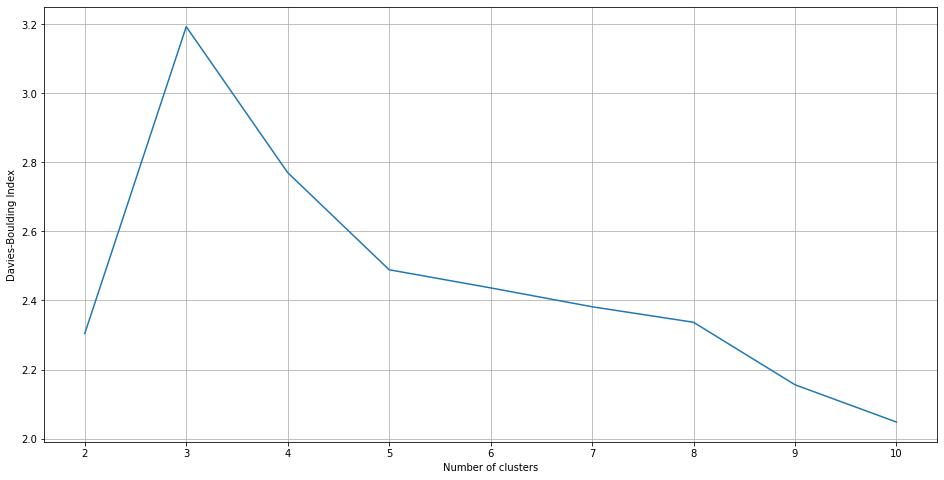

In [85]:
Davies_Bouldin_Method(Data = Standardized_SP_data,KRange = range(2,11))

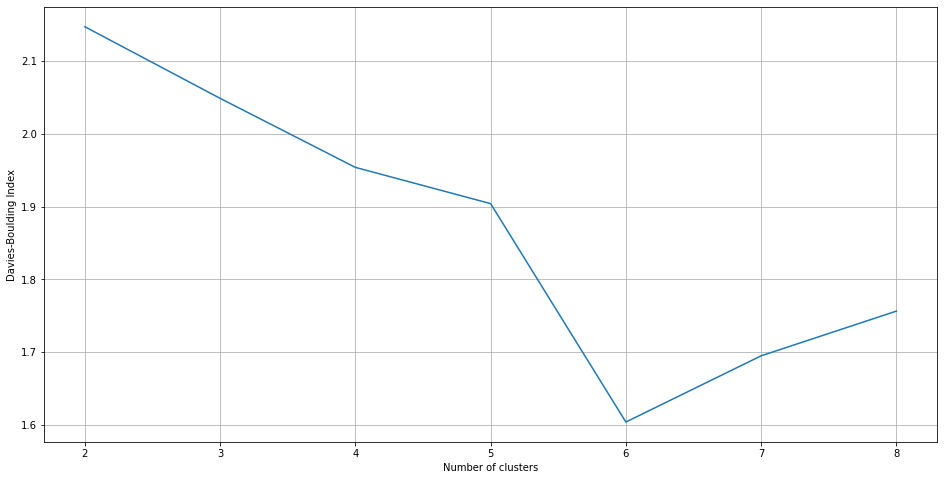

In [86]:
Davies_Bouldin_Method(Data = Normalized_SP_data,KRange = range(2,9))

Obtained K value from DBI is 6 for normalized data and 10 which uncertain for standardized data

In [87]:
raise "Get K value from normalized graph of DBI "

TypeError: exceptions must derive from BaseException

# Machine Learning
## Clusterization

In [88]:
KVALUE = 6
K_Means = KMeans(n_clusters = KVALUE,random_state=42)
K_Means.fit(Normalized_SP_data)
Clusters = pd.DataFrame(K_Means.labels_,columns=['Clusters'])
Output_data = pd.concat([Cleaned_SP_data,Clusters],axis='columns')

In [89]:
Clusters['Clusters'].value_counts()

3    1404
1     819
2     609
4     607
5     374
0     324
Name: Clusters, dtype: int64

In [90]:
Output_data

,num_of_prev_attempts,sum_click,imd_band_num,age_band_num,highest_education_num,East Anglian Region,East Midlands Region,Ireland,London Region,North Region,...,BBB,F,M,N,Y,Distinction,Fail,Pass,Withdrawn,Clusters
0,0,934,10.0,3,4,1,0,0,0,0,...,0,0,1,1,0,0,0,1,0,2
1,0,1435,3.0,2,4,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,2
2,0,281,4.0,2,3,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,5
3,0,2158,6.0,2,3,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,2
4,0,1034,6.0,1,2,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132,0,1051,9.0,2,4,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,3
4133,0,107,6.0,1,2,0,0,0,0,0,...,1,1,0,0,1,1,0,0,0,5
4134,0,387,1.0,1,2,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,3
4135,0,88,1.0,1,2,0,0,0,0,1,...,1,1,0,1,0,0,1,0,0,1


## Cluster Vizualisation for 2 variables (2 D plot)

In [91]:
def Calculate_Final_Result_Percentage(dic):
    tot = 0
    per = dict()
    for key,value in dic.items():
        tot+=value
    print('Total:',tot)    
    for key,_ in dic.items():
        per[key] = round((dic[key]/tot)* 100,2)
        print(key)
        print(key +' percentage:',round((dic[key]/tot)* 100,2))
    x_key = []
    x_value = []
    
    for k in sorted(per.keys()):
            x_key.append(k)
            x_value.append(per[k])
            
    x_ticks = np.arange(len(x_key))
    plt.bar(x_ticks,x_value,width=0.4)#color=['#FBFF00','r','g','#00C8F9']
    plt.xticks(x_ticks,x_key,rotation='vertical')
    plt.xlabel('final result')
    plt.ylabel('percentage')
    plt.show()
    return per

# Data Visualization

Total: 324
Distinction
Distinction percentage: 100.0


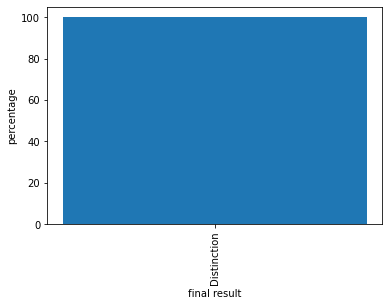

{'Distinction': 324}


Total: 819
Fail
Fail percentage: 100.0


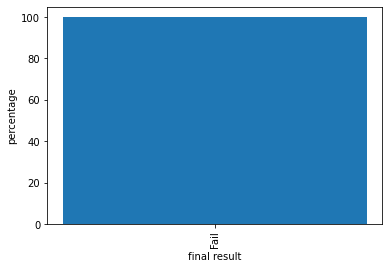

{'Fail': 819}


Total: 609
Pass
Pass percentage: 77.34
Withdrawn
Withdrawn percentage: 9.03
Fail
Fail percentage: 8.54
Distinction
Distinction percentage: 5.09


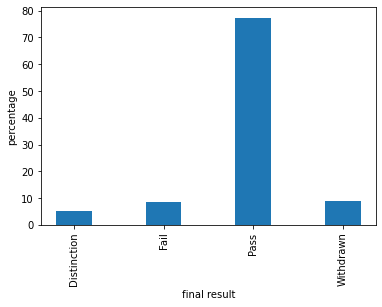

{'Pass': 471, 'Withdrawn': 55, 'Fail': 52, 'Distinction': 31}


Total: 1404
Pass
Pass percentage: 100.0


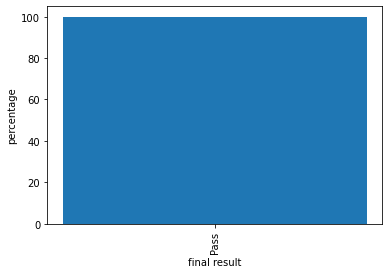

{'Pass': 1404}


Total: 607
Withdrawn
Withdrawn percentage: 100.0


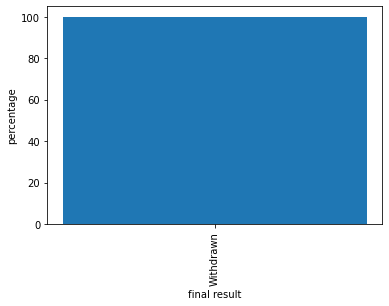

{'Withdrawn': 607}


Total: 374
Pass
Pass percentage: 41.44
Fail
Fail percentage: 27.54
Withdrawn
Withdrawn percentage: 25.67
Distinction
Distinction percentage: 5.35


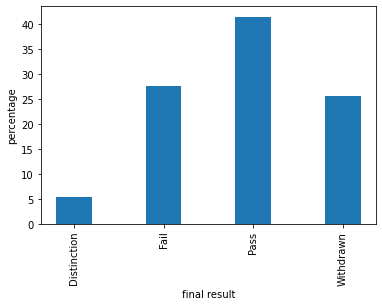

{'Pass': 155, 'Fail': 103, 'Withdrawn': 96, 'Distinction': 20}




In [92]:
C = []
C_dic = []
C_dic_per = []
for c in range(0,KVALUE):
    C.append(True_data2[Clusters['Clusters'] == c])
    C_dic.append(dict(C[-1]['final_result'].value_counts()))
    C_dic_per.append(Calculate_Final_Result_Percentage(C_dic[-1]))
    print(C_dic[-1])
    print()
    print()


##  Exporting Clusters for external use

In [95]:
for i in range(KVALUE):
    C[i].to_csv('cluster{0}.csv'.format(i))

Pair plot method

In [96]:
def PlotForTwoFeatures(data,ft1,ft2):
    col = ['b','r','g','y','orange','black']
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    for k in range(KVALUE):
        x = data[Clusters['Clusters'] == k][ft1]
        y = data[Clusters['Clusters'] == k][ft2]
        ax1.scatter(x, y, c=col[k], marker="o", label='cluster {0}'.format(k))
        plt.xlabel(ft1)
        plt.ylabel(ft2)
        plt.legend(loc='upper right')
    plt.show()    



### Pair Plots for all clusters

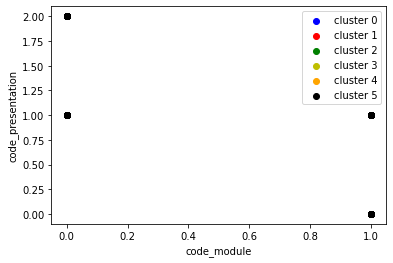

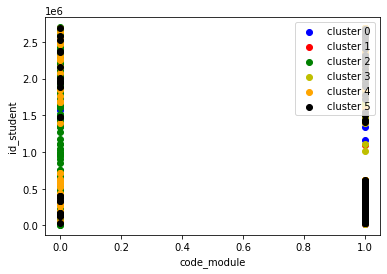

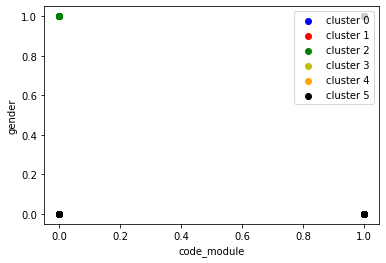

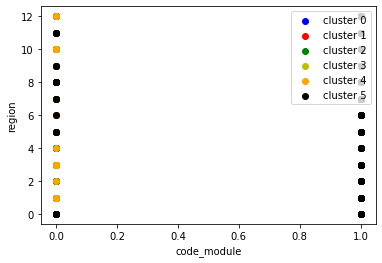

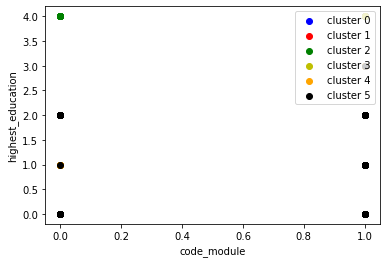

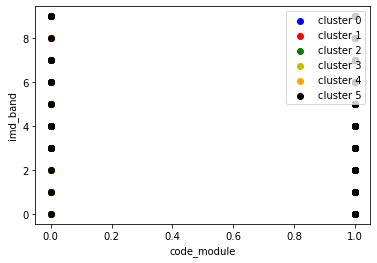

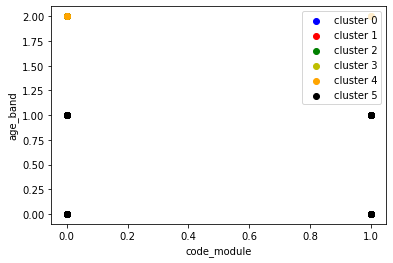

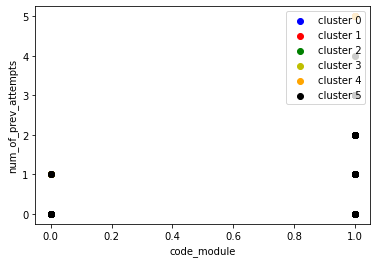

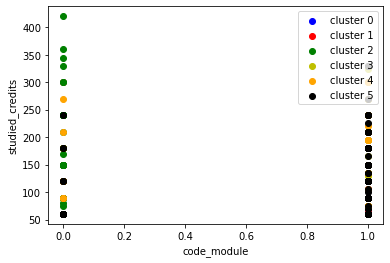

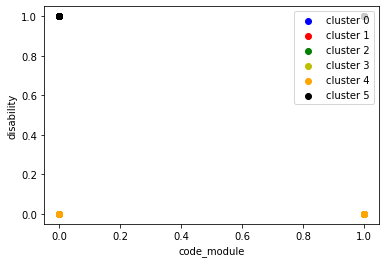

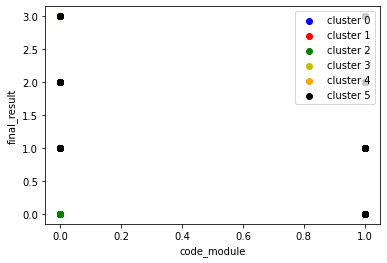

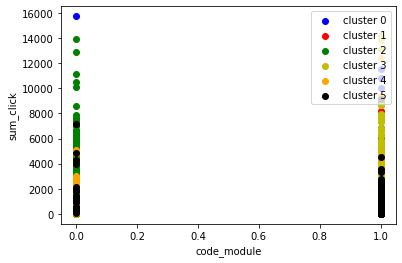

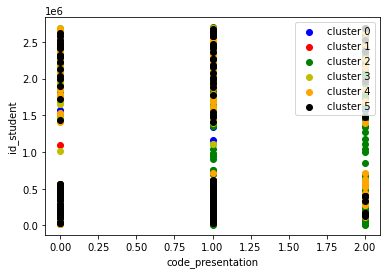

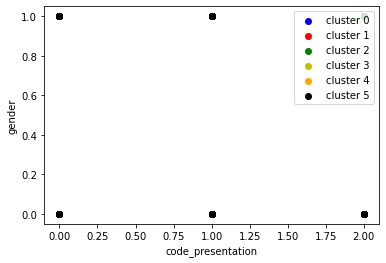

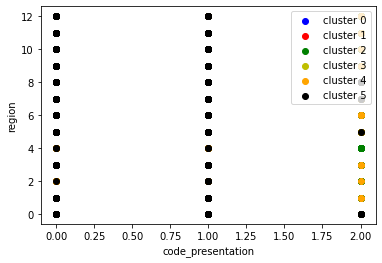

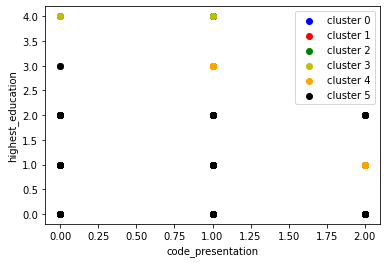

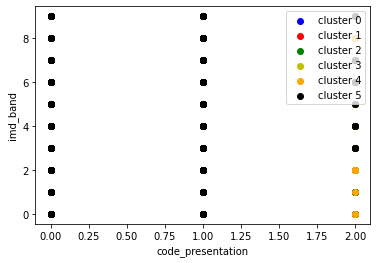

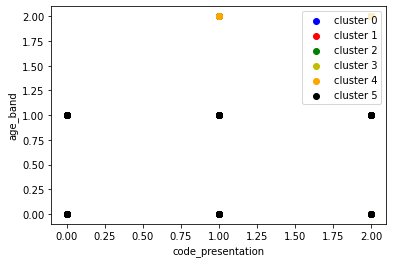

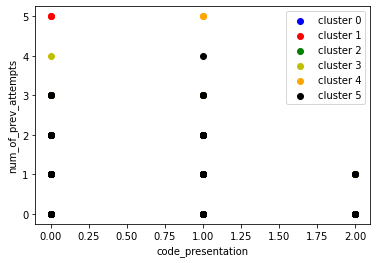

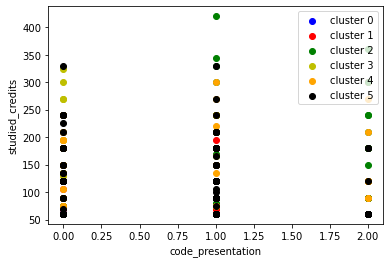

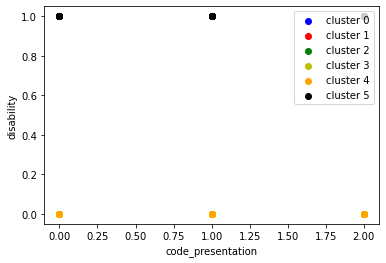

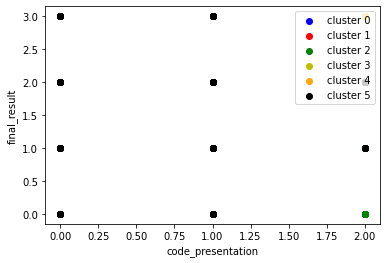

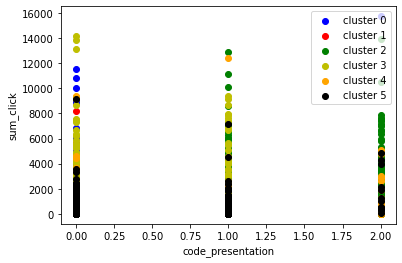

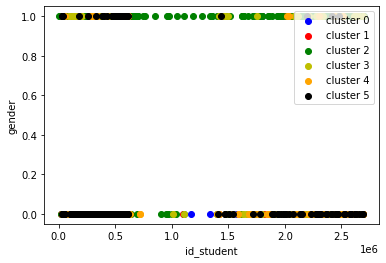

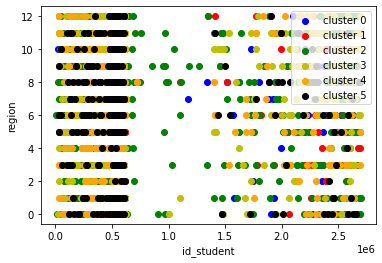

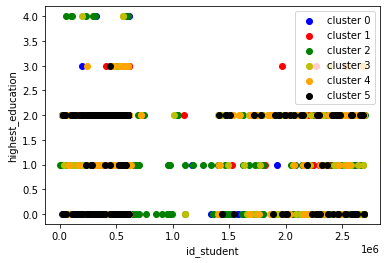

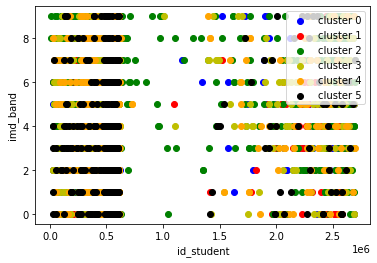

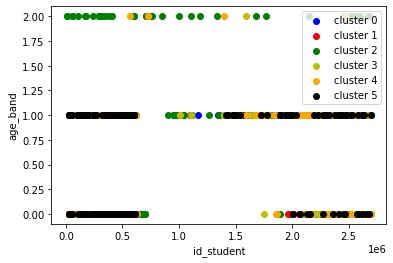

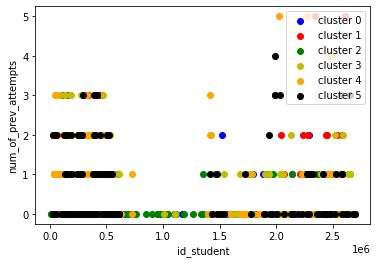

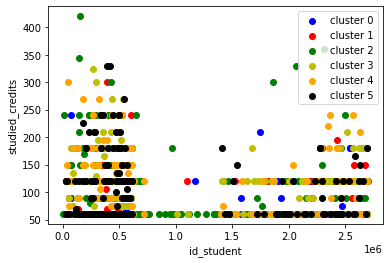

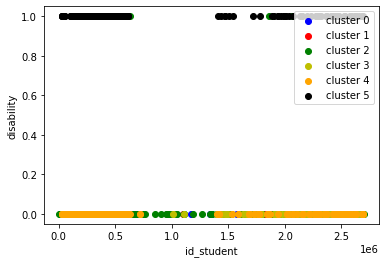

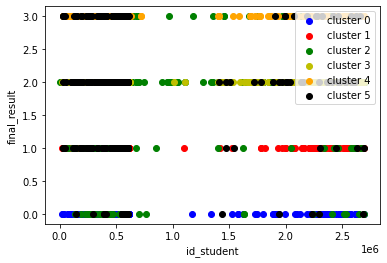

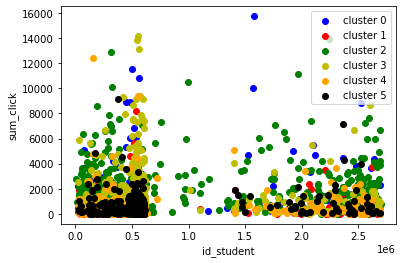

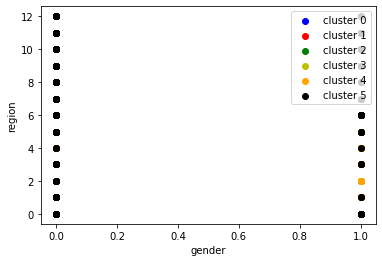

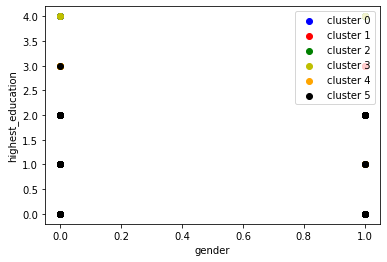

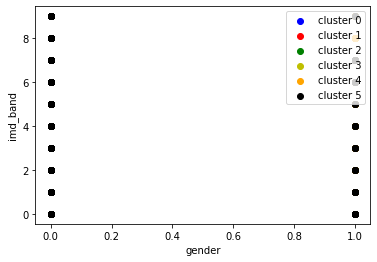

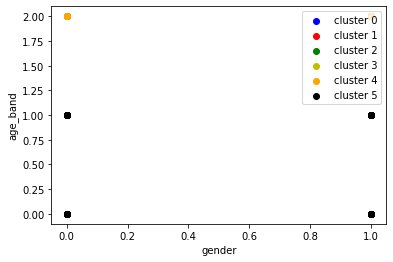

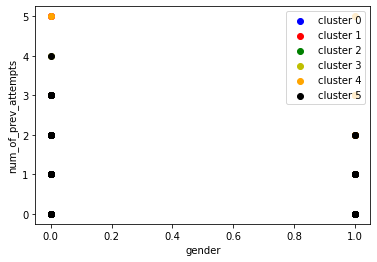

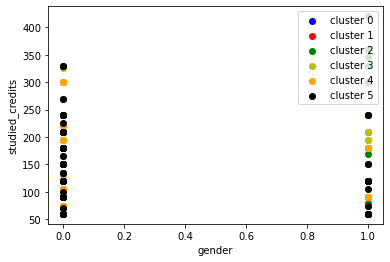

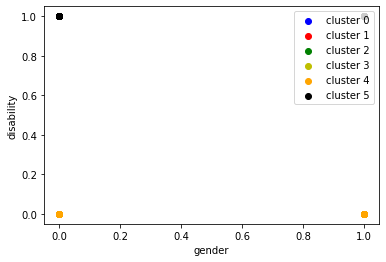

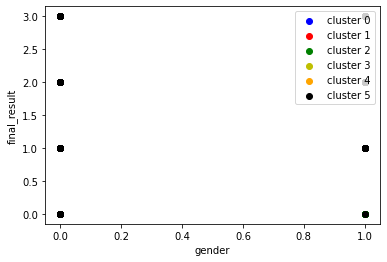

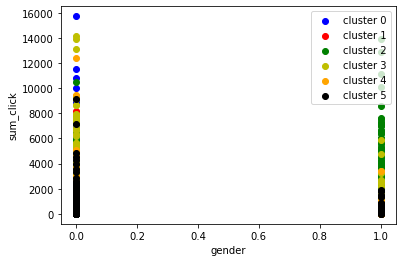

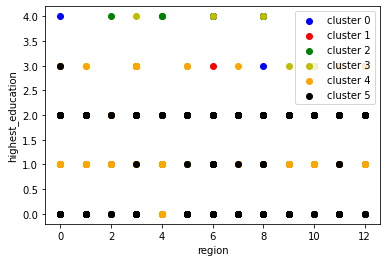

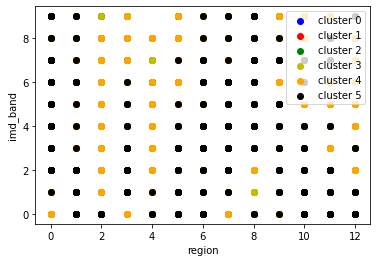

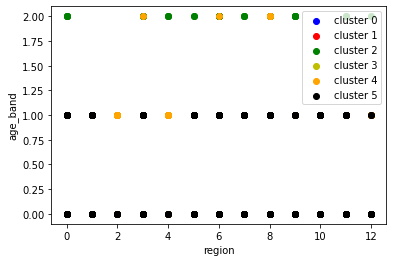

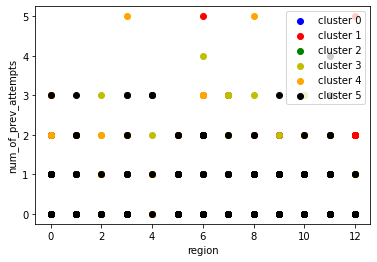

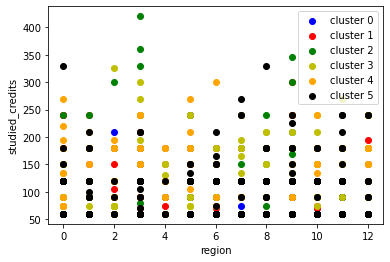

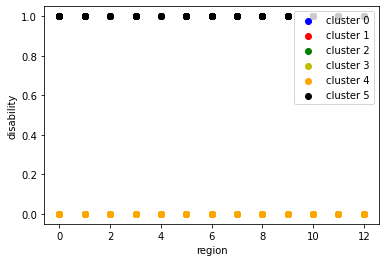

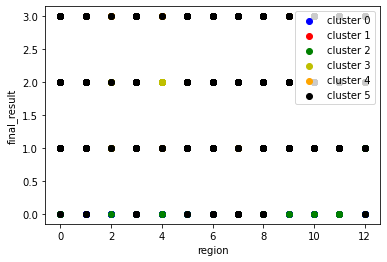

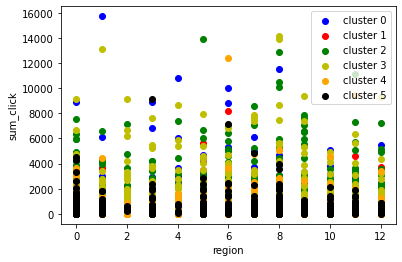

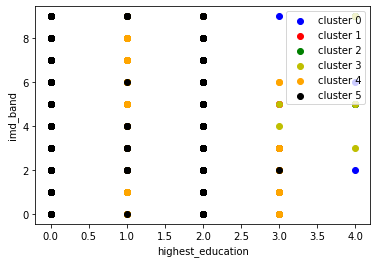

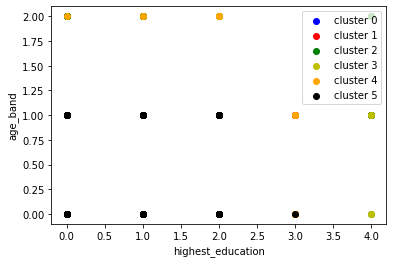

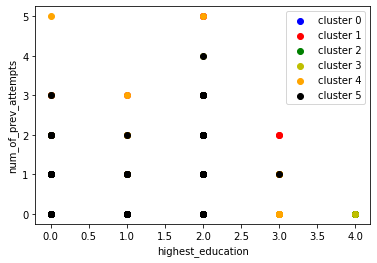

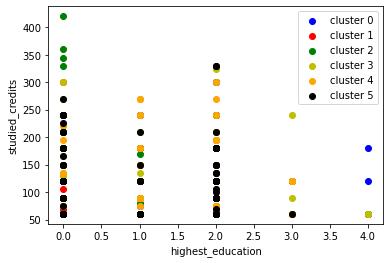

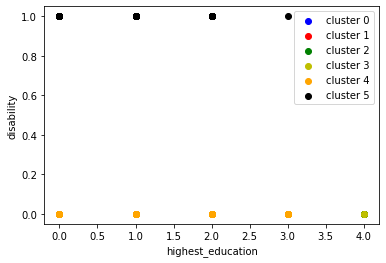

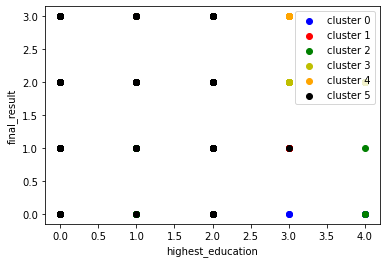

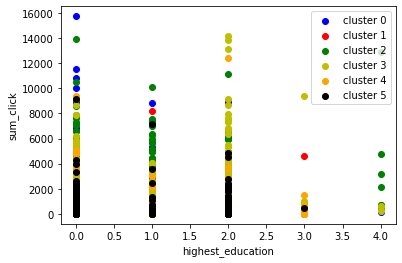

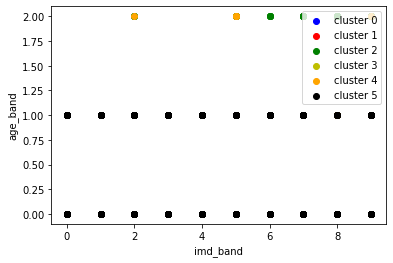

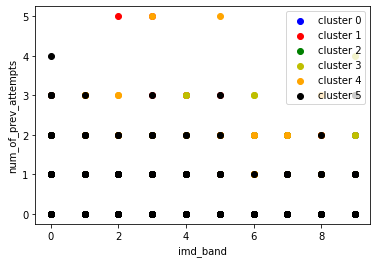

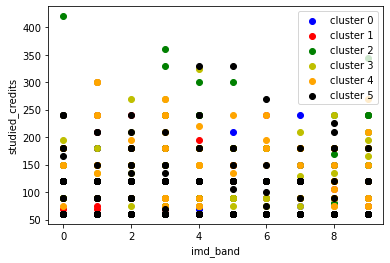

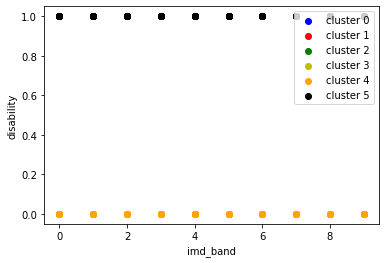

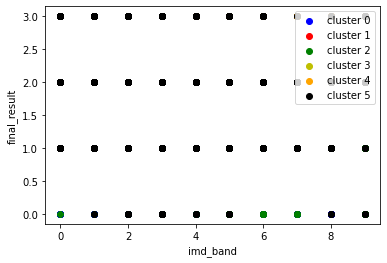

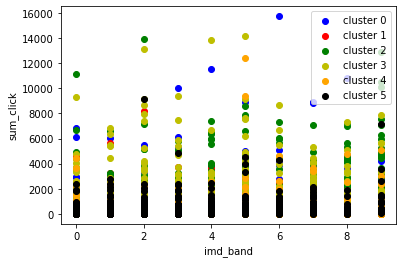

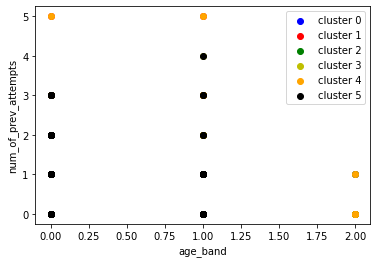

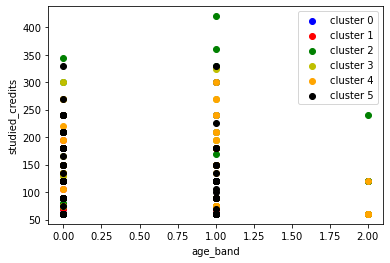

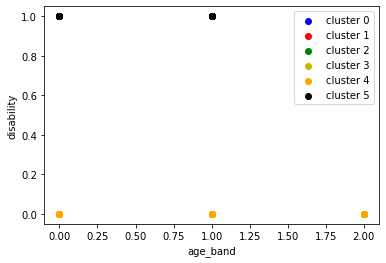

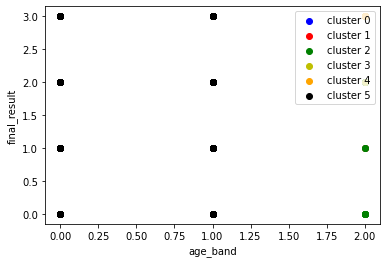

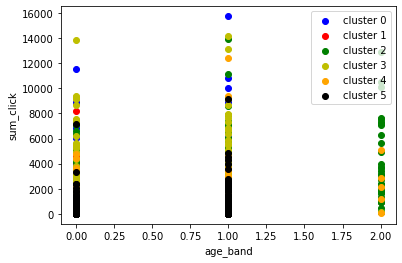

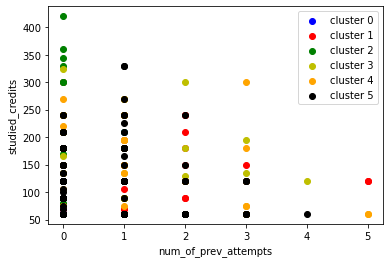

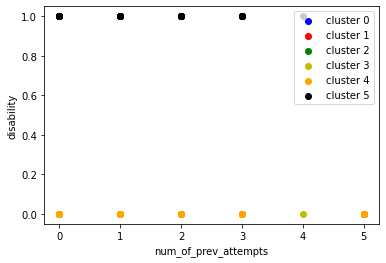

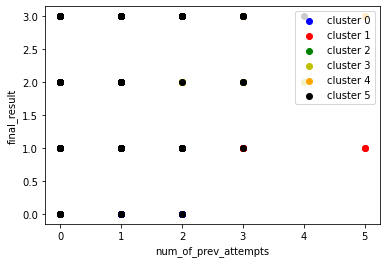

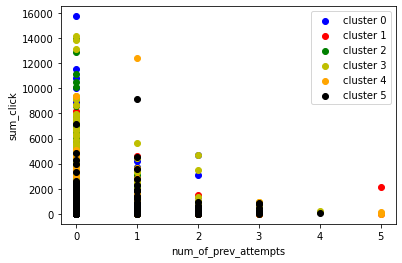

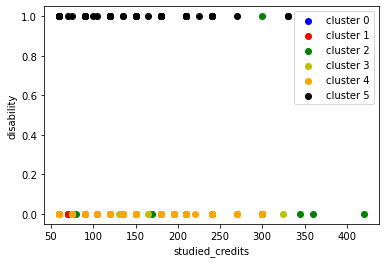

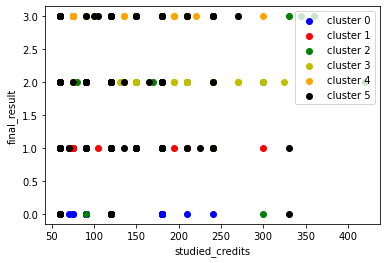

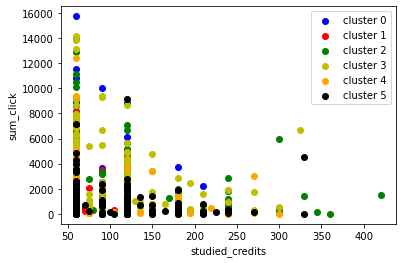

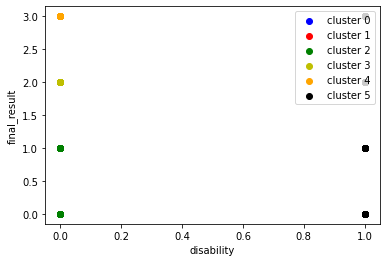

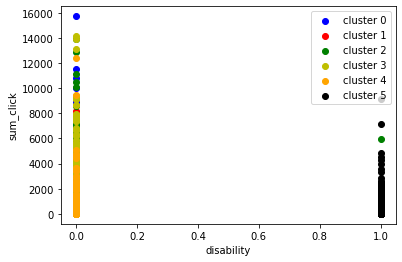

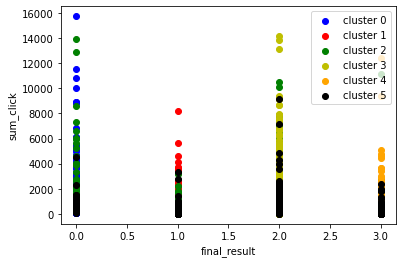

In [97]:
cols = list(True_data1.columns)
for i in range(len(cols)):
    for j in range(i+1,len(cols)):
        PlotForTwoFeatures(True_data1,cols[i],cols[j])

## Gender vs region

In [98]:
f = True_data2[['gender','region']]
dic = {}
for index,row in f.iterrows():
    if row['region'] in dic:
            if row['gender'] in dic[row['region']]:
                    dic[row['region']][row['gender']] += 1
            else:
                    dic[row['region']][row['gender']] = 1
    else:
        dic[row['region']] = {}
        dic[row['region']][row['gender']] = 1
        

In [99]:
dic

{'East Anglian Region': {'M': 81, 'F': 387},
 'Scotland': {'F': 296, 'M': 87},
 'North Western Region': {'F': 238, 'M': 55},
 'South East Region': {'F': 227, 'M': 63},
 'West Midlands Region': {'F': 277, 'M': 62},
 'Wales': {'M': 84, 'F': 324},
 'North Region': {'M': 33, 'F': 113},
 'South Region': {'M': 82, 'F': 290},
 'Ireland': {'M': 30, 'F': 162},
 'South West Region': {'M': 63, 'F': 261},
 'East Midlands Region': {'M': 41, 'F': 237},
 'Yorkshire Region': {'M': 52, 'F': 223},
 'London Region': {'M': 74, 'F': 295}}

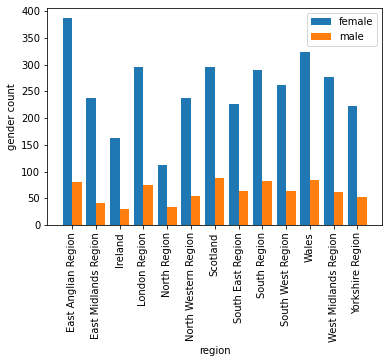

In [100]:
ticks = list(sorted(dic.keys()))
male = []
female =[]
for i in range(len(ticks)):
    male.append(dic[ticks[i]]['M'])
    female.append(dic[ticks[i]]['F'])
    
x_axis = np.arange(len(ticks))
plt.bar(x_axis -0.2, female, width=0.4, label = 'Female')
plt.bar(x_axis +0.2, male, width=0.4, label = 'Male')
plt.xticks(x_axis, ticks,rotation='vertical')
plt.legend(['female','male'])
plt.xlabel('region')
plt.ylabel('gender count')
plt.show()

## Reading Exported Clusters 

In [101]:
C = []
for i in range(KVALUE):
    C.append(pd.read_csv('cluster{0}.csv'.format(i)))
    

Piechart and Bar plot method

In [102]:
def Plot_Indices_And_Values(data,column,diagram):
    indices = data[column].value_counts().index
    values = data[column].value_counts().values
    if diagram == 0:
        plt.pie(values,labels = indices,autopct='%1.2f%%')
    elif diagram == 1:
        x_axis = np.arange(len(indices))
        plt.bar(x_axis,height = values)
        plt.xticks(x_axis, indices,rotation='vertical')
        plt.xlabel(column)
        plt.ylabel('values')
    elif diagram == 2:
        x_axis = np.arange(len(indices))
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.pie(values,labels = indices,autopct='%1.2f%%')
        plt.subplot(1,2,2)
        plt.bar(x_axis,height = values)
        plt.xticks(x_axis, indices,rotation='vertical')
        plt.xlabel(column)
        plt.ylabel('values')
    plt.show()
        

Scatter method

In [103]:
def Scatter(data,ft1,ft2,col,cluster_num):
    fig = plt.figure(figsize=(10,5))
    x = data[ft1]
    y = data[ft2]
    plt.scatter(x, y, c=col, marker="o", label='cluster {0}'.format(cluster_num))
    plt.xlabel(ft1)
    plt.ylabel(ft2)
    plt.legend(loc='upper right')
    plt.show()    




Analyse method

In [104]:
def Analyse(data,c):
    col = ['b','r','g','y','orange','black']
    Scatter(data,'id_student','sum_click',col[c],c)
    Plot_Indices_And_Values(data,'final_result',0)
    Plot_Indices_And_Values(data,'gender',0)
    Plot_Indices_And_Values(data,'region',0)
    Plot_Indices_And_Values(data,'highest_education',0)
    Plot_Indices_And_Values(data,'code_module',0)
    Plot_Indices_And_Values(data,'disability',0)
    Plot_Indices_And_Values(data,'age_band',0)
    Plot_Indices_And_Values(data,'imd_band',0)
    
    
    

# Cluster Analysis

## Analysis of cluster 5

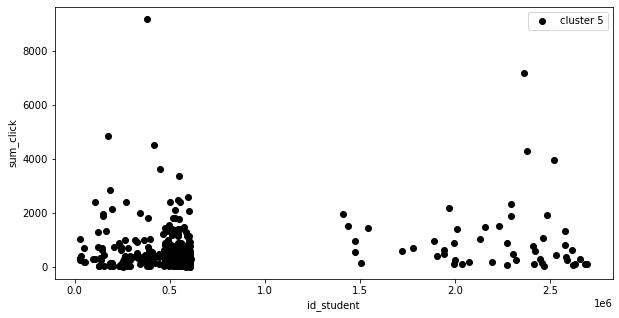

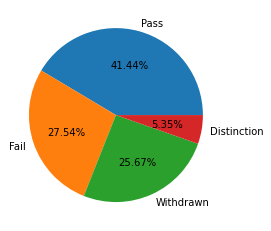

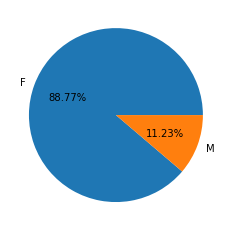

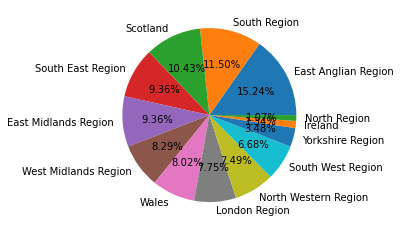

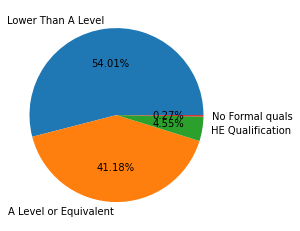

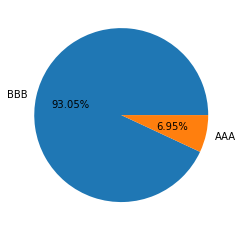

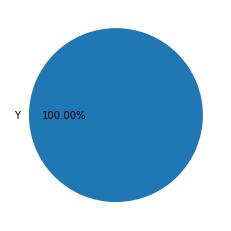

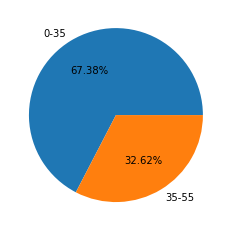

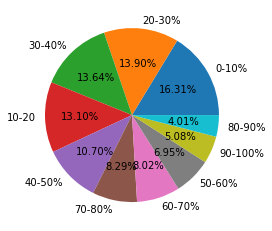

In [105]:
Analyse(C[5],5)

## Analysis of Cluster 4

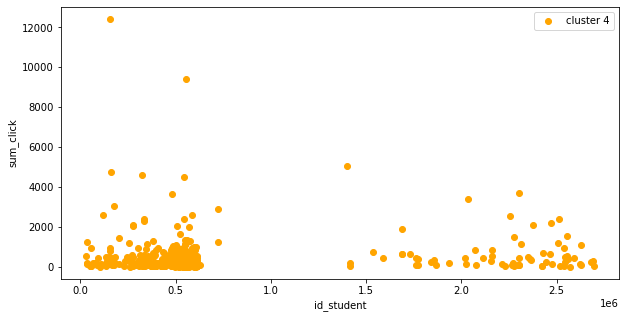

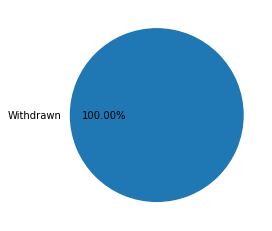

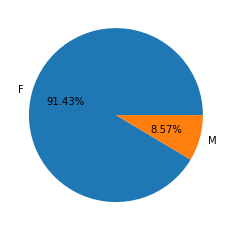

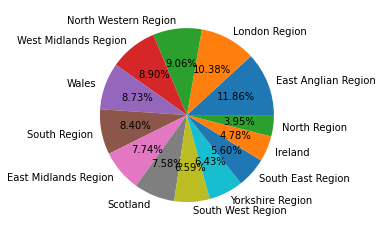

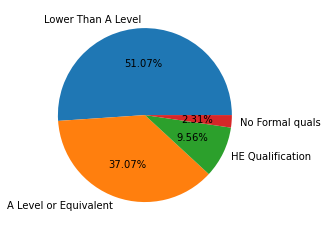

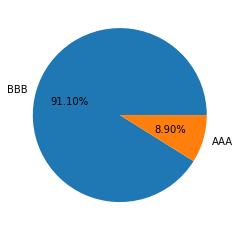

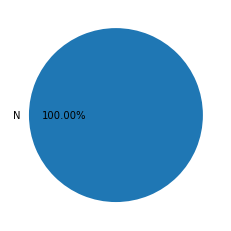

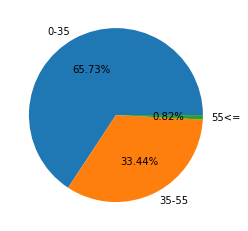

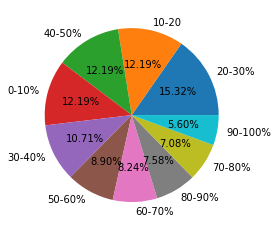

In [106]:
Analyse(C[4],c = 4)

## Analysis of Cluster 3

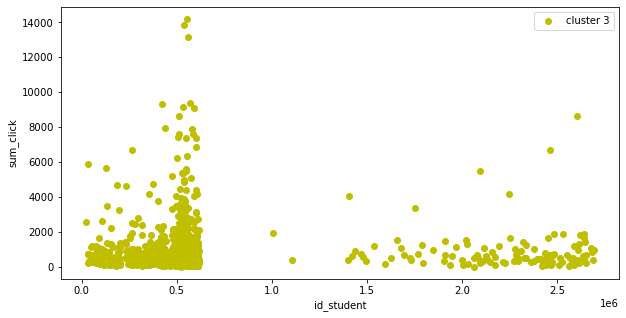

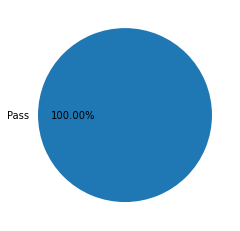

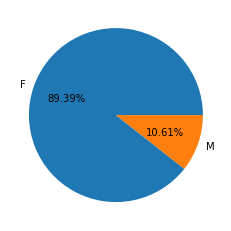

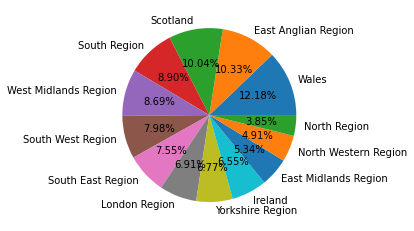

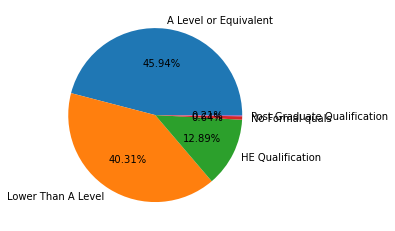

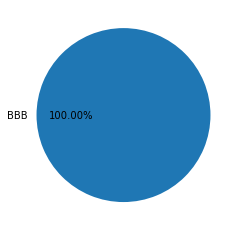

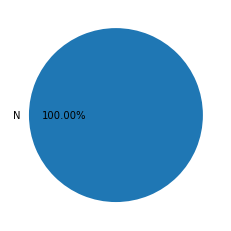

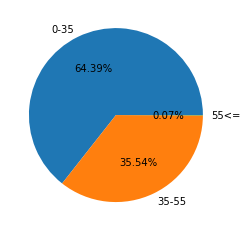

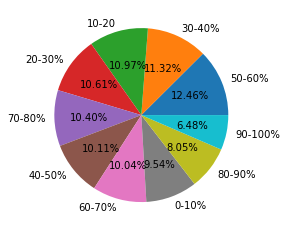

In [107]:
Analyse(C[3],c = 3)

## Analysis of Cluster 2 

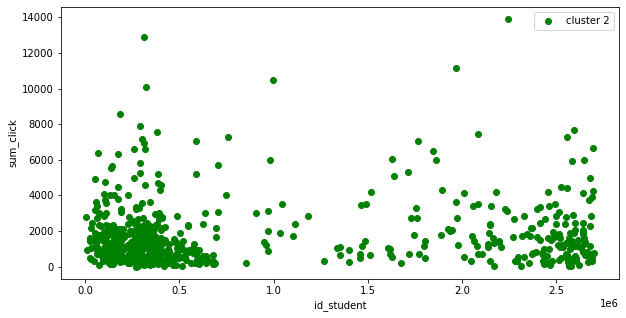

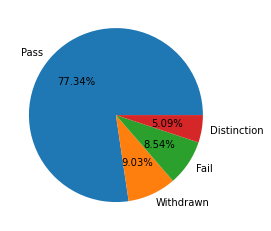

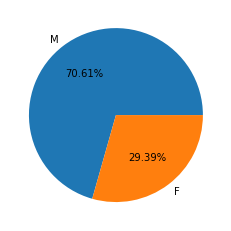

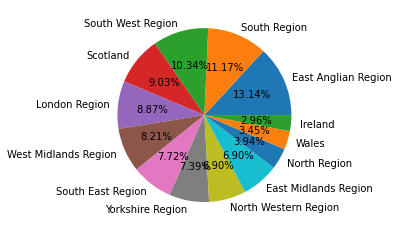

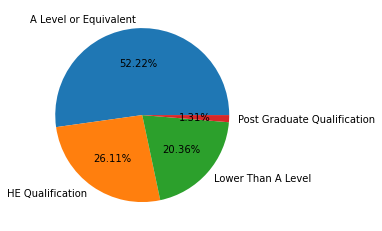

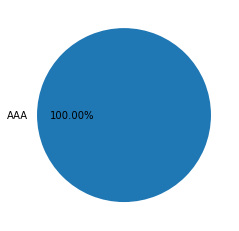

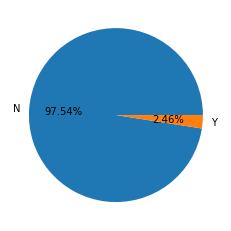

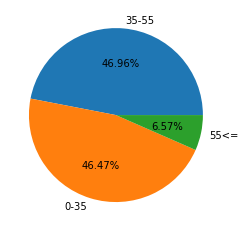

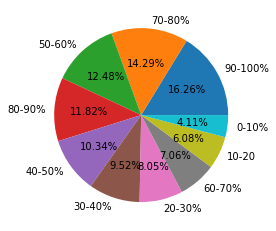

In [108]:
Analyse(C[2],c=2)

## Analysis of Cluster 1

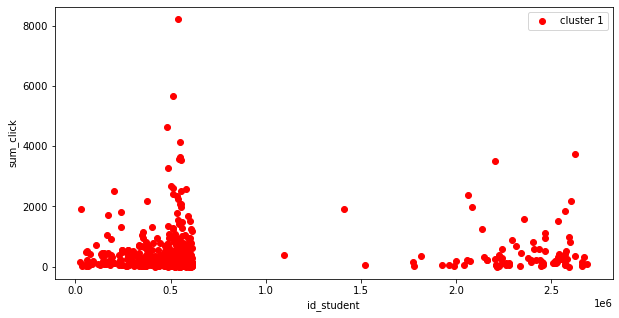

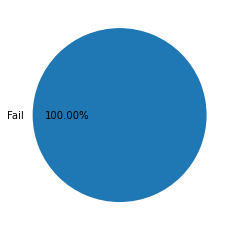

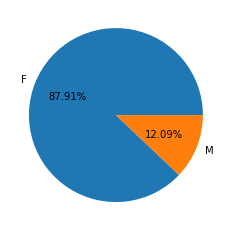

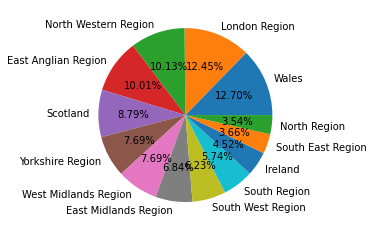

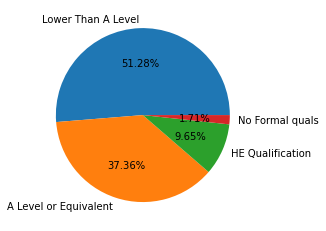

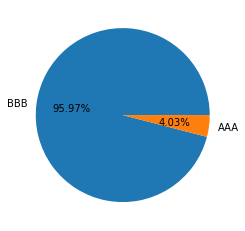

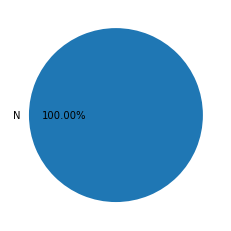

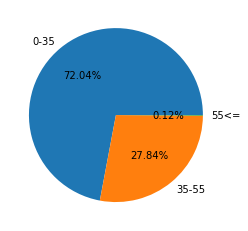

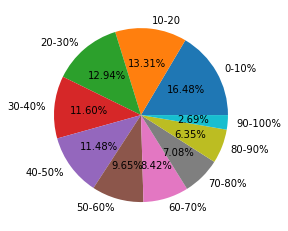

In [109]:
Analyse(C[1],c=1)

## Analysis of Cluster 0

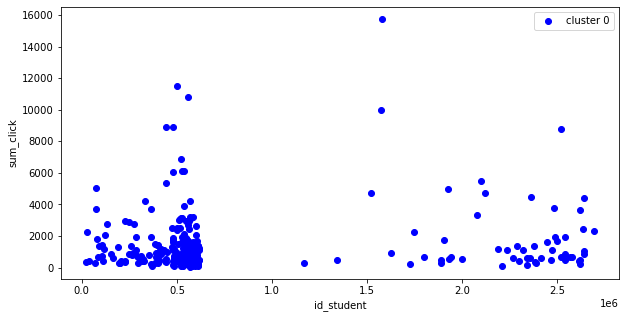

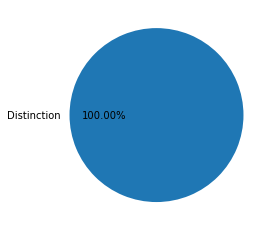

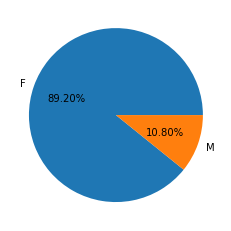

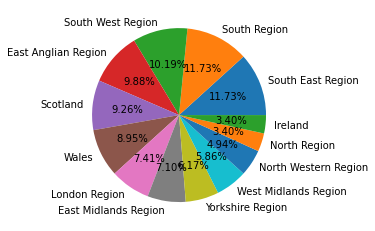

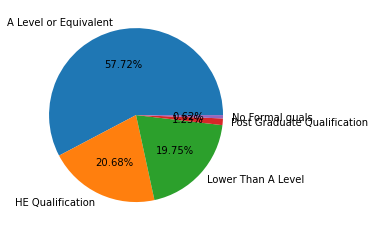

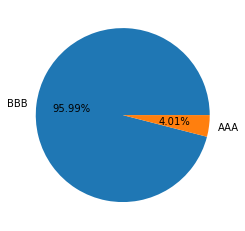

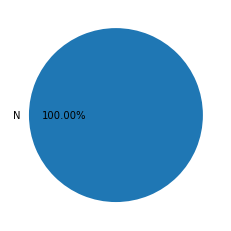

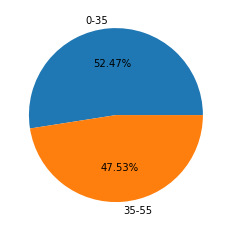

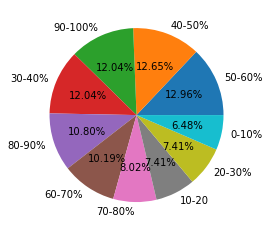

In [110]:
Analyse(C[0],c=0)


## Inter cluster Analysis

In [125]:
clu = list(range(6))

## Final Result

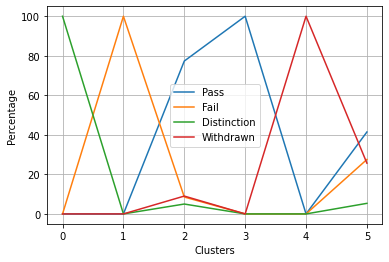

In [133]:
Pass = [0,0,77.34,100,0,41.44]
Fail = [0,100,8.54,0,0,27.54]
Distinction = [100,0,5.0,0,0,5.35]
Withdrawn = [0,0,9.03,0,100,25.67]
plt.plot(clu,Pass)
plt.plot(clu,Fail)
plt.plot(clu,Distinction)
plt.plot(clu,Withdrawn)
plt.xlabel('Clusters')
plt.ylabel('Percentage')
plt.legend(["Pass", "Fail","Distinction","Withdrawn"])
plt.grid(True)
plt.show()

## Disability

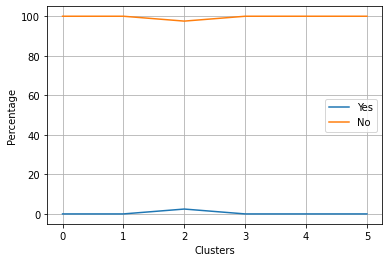

In [127]:
Yes = [0,0,2.46,0,0,0]
No = [100,100,97.54,100,100,100]
plt.plot(clu,Yes)
plt.plot(clu,No)
plt.xlabel('Clusters')
plt.ylabel('Percentage')
plt.legend(["Yes", "No"])
plt.grid(True)
plt.show()

## Code Module

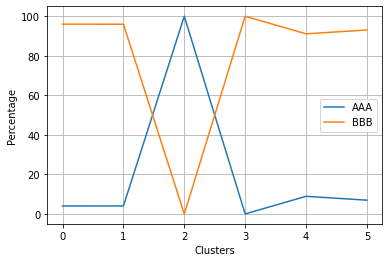

In [137]:
AAA=[4.01,4.03,100,0,8.90,6.95]
BBB=[95.99,95.97,0,100,91.10,93.05]
plt.plot(clu,AAA)
plt.plot(clu,BBB)
plt.xlabel('Clusters')
plt.ylabel('Percentage')
plt.legend(["AAA", "BBB"])
plt.grid(True)
plt.show()

## Gender

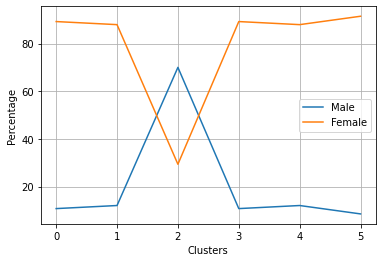

In [130]:
Male=[10.80,12.09,70,10.80,12.09,8.57]
Female=[89.20,87.91,29.39,89.20,87.91,91.43]
plt.plot(clu,Male)
plt.plot(clu,Female)
plt.xlabel('Clusters')
plt.ylabel('Percentage')
plt.legend(["Male", "Female"])
plt.grid(True)
plt.show()

## Age Band

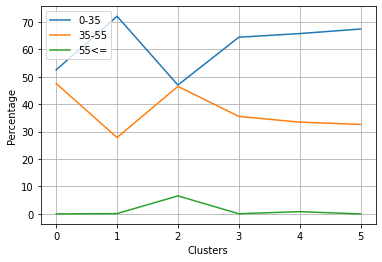

In [131]:
_0_35 = [52.47,72.04,46.96,64.39,65.73,67.38]
_35_55 = [47.53,27.84,46.47,35.54,33.44,32.62]
_55 = [0,0.12,6.57,0.07,0.82,0]
plt.plot(clu,_0_35)
plt.plot(clu,_35_55)
plt.plot(clu,_55)
plt.xlabel('Clusters')
plt.ylabel('Percentage')
plt.legend(["0-35", "35-55","55<="])
plt.grid(True)
plt.show()

## Highest Education

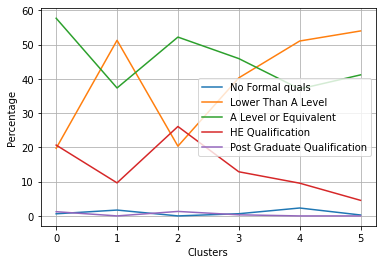

In [216]:
No_Formal_quals=[0.62,1.71,0,0.64,2.31,0.27]
Lower_Than_A_Level=[19.75,51.28,20.36,40.31,51.07,54.01]
A_Level_or_Equivalent=[57.72,37.36,52.22,45.94,37.07,41.18]
HE_Qualification=[20.68,9.65,26.11,12.89,9.56,4.55]
Post_Graduate_Qualification=[1.23,0,1.31,0.32,0,0]

plt.plot(clu,No_Formal_quals)
plt.plot(clu,Lower_Than_A_Level)
plt.plot(clu,A_Level_or_Equivalent)
plt.plot(clu,HE_Qualification)
plt.plot(clu,Post_Graduate_Qualification)

plt.xlabel('Clusters')
plt.ylabel('Percentage')
plt.legend(["No Formal quals", "Lower Than A Level","A Level or Equivalent","HE Qualification","Post Graduate Qualification"])
plt.grid(True)
plt.show()

 ## Region

In [179]:
East_Anglian_Region = [9.88,10.01,13.14,10.33,11.86,15.24]
London_Region=[7.41,12.45,8.87,6.91,10.38,7.75]
North_Western_Region = [4.94,10.13,6.90,4.91,9.06,7.49]
Scotland=[9.26,8.79,9.03,10.04,7.58,10.43]

South_East_Region =[11.73,3.66,7.72,7.55,5.60,9.36]
South_Region =[11.73,5.74,11.17,8.90,8.40,11.50]
South_West_Region= [10.19,6.23,10.34,7.98,6.59,6.68]
Wales = [8.95,12.70,3.45,12.18,8.73,8.02]

Table = [East_Anglian_Region,London_Region,North_Western_Region
         ,Scotland,South_East_Region
         ,South_East_Region,South_Region
         ,South_West_Region,Wales]


X = ['East_Anglian_Region','London_Region'
     ,'North_Western_Region','Scotland'
     ,'South_East_Region','South Region'
     ,'South_West_Region','Wales']



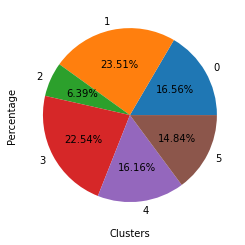

In [235]:
# plt.pie(clu,East_Anglian_Region)
# plt.pie(clu,London_Region)
# plt.pie(clu,North_Western_Region )
# plt.pie(clu,Scotland)

plt.pie(Wales ,labels = clu,autopct='%1.2f%%')

plt.xlabel('Clusters')
plt.ylabel('Percentage')
# plt.legend(X[0:4])

plt.show()

# THE END